In [1]:
from sacred import Experiment
%load_ext autoreload
%autoreload 2

In [2]:
from deploy.clut_mnist_project import *
from mlproject import data

ex_name = "clut-mnist_all-cnn-96"
ex = Experiment(interactive=True, name=ex_name)
ex.add_config({
    'batch_size': 90,
    'n_epochs':  5,
    'lr': 0.0003,
    'opt': 'sgd',
    'momentum': 0.9,
    'clutters': 21,
    'device': 'cuda:1',
    'beta': 0.00001,
    'beta_fadein': [0, 0, 0.3, 0.7, 1],
    'train_samples':60021,
    'data_dir': '../../data/cluttered_mnist_60021',
    'model_dir': "experiments/"+ex_name+"/models",
})

proj = None
@ex.main
def main(_run):
    global proj
    proj = ClutteredMNISTProject.from_run(_run)
    print(proj.setup.model.family())
    proj.data_example()
    proj.test()
    proj.train()
    proj.test()
    proj.visualize_info_dropout(proj.holder.model.get_info_layers())
ex.run()


WARNING - clut-mnist_all-cnn-96 - No observers have been added to this run
INFO - clut-mnist_all-cnn-96 - Running command 'main'
INFO - clut-mnist_all-cnn-96 - Started


Run Config: 
    batch_size: 90
    n_epochs..: 5
    lr........: 0.0003
    opt.......: sgd
    momentum..: 0.9
    clutters..: 21
    device....: cuda:1
    beta......: 1e-05
    beta_fadein: [0, 0, 0.3, 0.7, 1]
    train_samples: 60021
    data_dir..: ../../data/cluttered_mnist_60021
    model_dir.: experiments/clut-mnist_all-cnn-96/models
    seed......: 853819947
All-CNN-96 InfoDropout


<Figure size 640x480 with 1 Axes>

label:  [[0.21858704 0.37595394 0.21346419 0.33070567 0.12083607 0.23228788
  0.35514197 0.2778148  0.2077667  0.01829729]]
testing...


  0%|          | 0/667 [00:00<?, ?it/s]

[TEST] accuracy: 0.0943, loss: 2.3030
data length 667
new epoch - beta facor is  0


100%|##########| 667/667 [02:45<00:00,  4.03it/s]

model saved: /home/karlschulz/projects/attribution/experiments/clut-mnist_all-cnn-96/models/10005495824_ClutMNISTSetup/ClutMNISTSetup_e00000_b00666.torch
testing...



  0%|          | 1/667 [00:00<01:13,  9.04it/s]

[TEST] accuracy: 0.1911, loss: 2.2115
data length 667
new epoch - beta facor is  0


100%|##########| 667/667 [01:42<00:00,  5.90it/s]

model saved: /home/karlschulz/projects/attribution/experiments/clut-mnist_all-cnn-96/models/10005495824_ClutMNISTSetup/ClutMNISTSetup_e00001_b00666.torch
testing...



  0%|          | 0/667 [00:00<?, ?it/s]

[TEST] accuracy: 0.6472, loss: 1.0256
data length 667
new epoch - beta facor is  0.3


100%|##########| 667/667 [01:40<00:00,  6.03it/s]

model saved: /home/karlschulz/projects/attribution/experiments/clut-mnist_all-cnn-96/models/10005495824_ClutMNISTSetup/ClutMNISTSetup_e00002_b00666.torch
testing...



  0%|          | 1/667 [00:00<01:08,  9.78it/s]

[TEST] accuracy: 0.9224, loss: 0.4301
data length 667
new epoch - beta facor is  0.7


100%|##########| 667/667 [01:42<00:00,  5.74it/s]

model saved: /home/karlschulz/projects/attribution/experiments/clut-mnist_all-cnn-96/models/10005495824_ClutMNISTSetup/ClutMNISTSetup_e00003_b00666.torch
testing...



  0%|          | 1/667 [00:00<01:12,  9.15it/s]

[TEST] accuracy: 0.9496, loss: 0.3041
data length 667
new epoch - beta facor is  1


100%|##########| 667/667 [01:46<00:00,  5.46it/s]

model saved: /home/karlschulz/projects/attribution/experiments/clut-mnist_all-cnn-96/models/10005495824_ClutMNISTSetup/ClutMNISTSetup_e00004_b00666.torch
testing...


[TEST] accuracy: 0.9691, loss: 0.1950
testing...


ERROR - clut-mnist_all-cnn-96 - Failed after 0:11:54!


[TEST] accuracy: 0.9682, loss: 0.1902


AttributeError: 'ClutteredMNISTProject' object has no attribute 'holder'

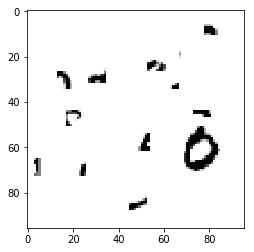

label:  [[15.213096    1.6449153   4.3649254   0.37843043  0.5648443   0.9788653
   9.466237    0.96818733  9.284794    5.163438  ]]
alpha: shape=(48, 48), max=0.7005588412284851, min=0.4742427468299866, std=0.023647, mean=0.6941001415252686


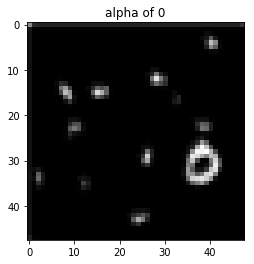

alpha: shape=(24, 24), max=0.7005041241645813, min=0.3966745436191559, std=0.035057, mean=0.6903647184371948


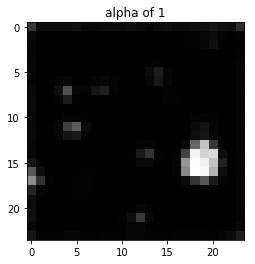

alpha: shape=(12, 12), max=0.6848964691162109, min=0.42219534516334534, std=0.039681, mean=0.6653508543968201


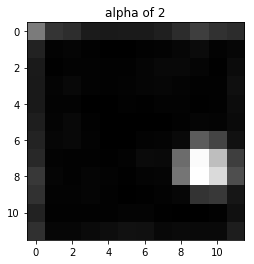

alpha: shape=(6, 6), max=0.5341773629188538, min=0.4228553771972656, std=0.027369, mean=0.5011886358261108


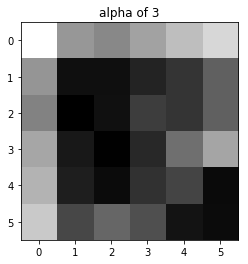

(48, 48)
KL: shape=(48, 48), max=0.6031396985054016, min=0.0006318949162960052, std=0.054124, mean=0.01427788008004427


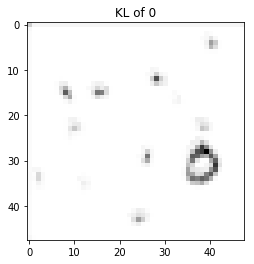

(24, 24)
KL: shape=(24, 24), max=1.7450261116027832, min=0.0007112827734090388, std=0.155180, mean=0.03132142126560211


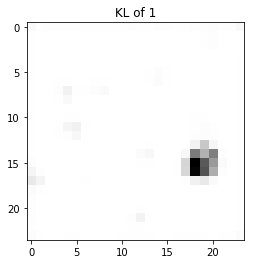

(12, 12)
KL: shape=(12, 12), max=1.7075809240341187, min=0.02711956948041916, std=0.238265, mean=0.09462659806013107


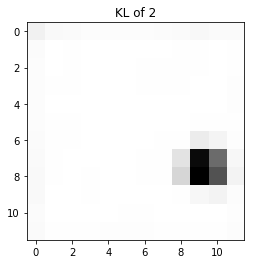

(6, 6)
KL: shape=(6, 6), max=1.1034938097000122, min=0.30734339356422424, std=0.187776, mean=0.4561649560928345


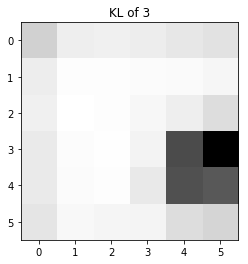

In [4]:

proj.visualize_info_dropout(proj.setup.model.get_info_layers())

In [ ]:
import torch.nn as nn
gen = list(list(nn.Conv2d(64, 64, 2).parameters()) for i in range(0,10)) #proj.holder.model.noised.alpha_bn.parameters()
p = list(gen)
for pa in p:
    print(pa.mean())

gen = proj.holder.model.noised.alpha_conv.parameters() #proj.holder.model.noised.alpha_bn.parameters()
p = list(gen)
for pa in p:
    print(pa.mean())